<a href="https://colab.research.google.com/github/Adiyasa26/Python_/blob/main/Perancangan_Fiber_To_The_Building_beserta_Analisisnya_TUBES_SKO_Ilyas_Adiyasa_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA**  : ILYAS ADIYASA

**NIM**   : 1101184270

**KELAS** : TT - 42 - 07


**Skenario Perancangan FTTB**:

Dari **sentral** menuju **ODC** kemudian ke **ODP** kemudian ke **Roset**. Satu gedung berisikan 40 lantai, tiap lantai terdapat 20 kamar. Dengan rencana tersebut kami akan menggunakan **4 konektor** dan **2 spliter**, dengan **spliter 1:64** dengan redaman **19.5 dB** untuk **ONU ke ODP** dan spliter **1:32** dengan redaman **16 dB** untuk **ODP ke Roset**. Kami menggunakan **fiber jenis G652D** dengan panjang gelombang **1490 nm** dengan redaman **0.28 dB/Km**. Selain itu, dengan jumlah konektor terdapat 4 dan splitter 2, maka **splicer ada 6** buah yang memiliki redaman **0.1 db**.


**Diketahui** : 


1.   Jenis Fiber = G652D (1490 nm)
2.   Hambatan Fiber = 0.28  dB/Km 
3.   Jumlah Konektor = 6 buah
4.   Hambatan Konekor = 0.3 dB
5.   Jumlah Splitter = 2 (1:64 dan 1:32)
6.   Hambatan Splitter = 19.5 dB dan 16 dB
7.   Jumlah Splicer = 8 buah
8.   Hambatan Splicer = 0.1 dB
9.   Safety Margin = 6 dB
10.  Margin = -0.23
11.  Faktor Gain = 0<F(M)<1 ambil 1
12.  Suhu Perangkat = 290 K
13.  Arus Gelap = 200 nA
14.  Hambatan Ekuivalensi = 50 Ohm
15.  Responsivitas = 0.85 A/W





In [ ]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Converter
NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

#Parameter SNR
R = 0.85 #Responsivitas (A/W)
SM = 3 #Safety Margin (dB)
M = -0.23 #Tambahan daya sinyal APD (dB)
q = 1.6*10**-19
id = 200*10**-9 #arus gelap (A)
B = 8*10**9 #Bandwith (Hz)
F = 1 #F(M), Faktor Gain
K = 1.38*10**-23
Teff = 290 #Kelvin
RL = 50 #Ekuivalen Resistansi (Ohm)

#Parameter Pr
#jarak dari sentral ke ONU = 17 km
#jarak dari ONU ke Roset = <500 m --> Jarak ONU ke ODP = 4*29 = 116 m, Jarak ODP ke Roset terjauh = 4*20 = 80, Jarak ONU ke roset = 116 + 80 = 196 
#jarak total = 17000 + 116 = 17116 m

d = np.arange(0.197,17.197,0.5) #Jarak (km)
L_fiber = 0.28 #0.28 #Loss dari fiber berdasarkan jenis G625D (dB)  
N_splicer = 6 #Jumlah Splicer
L_splicer = 0.1 #Loss dari splicer (db)
N_connector = 4 #Jumlah Konektor
L_connector = 0.3 #Loss dari konektor (dB)
L_splitter = 16 + 19.5 #loss dari splitter (dB) diambil redaman yang paling kecil, milik 1:32
Pt = 3 #Daya tx (dBm)

In [ ]:
#RUMUS PR
def P_receive():
  #Pr,Pt (dBm)
  #L_fiber,N_splitter,L_splicer,N_connector,L_connector,L_splitter (dB)

  hambatan_fiber = d * L_fiber
  hambatan_splicer = N_splicer * L_splicer
  hambatan_connector = N_connector * L_connector

  alfa_total = hambatan_fiber + hambatan_splicer + hambatan_connector + L_splitter + SM
  Pr = Pt - alfa_total
  return Pr,alfa_total
Pr,alfa_total = P_receive()
print('Hambatan Total = ', alfa_total)
print('\nDaya Terima = ', Pr)

Hambatan Total =  [40.35516 40.49516 40.63516 40.77516 40.91516 41.05516 41.19516 41.33516
 41.47516 41.61516 41.75516 41.89516 42.03516 42.17516 42.31516 42.45516
 42.59516 42.73516 42.87516 43.01516 43.15516 43.29516 43.43516 43.57516
 43.71516 43.85516 43.99516 44.13516 44.27516 44.41516 44.55516 44.69516
 44.83516 44.97516]

Daya Terima =  [-37.35516 -37.49516 -37.63516 -37.77516 -37.91516 -38.05516 -38.19516
 -38.33516 -38.47516 -38.61516 -38.75516 -38.89516 -39.03516 -39.17516
 -39.31516 -39.45516 -39.59516 -39.73516 -39.87516 -40.01516 -40.15516
 -40.29516 -40.43516 -40.57516 -40.71516 -40.85516 -40.99516 -41.13516
 -41.27516 -41.41516 -41.55516 -41.69516 -41.83516 -41.97516]


In [ ]:
#Signal Power
def signal_power():
  Pr_num = LtN(Pr)
  ip = Pr_num * R
  Is_kuadrat = (ip*M)**2
  return ip,Is_kuadrat
ip,Is_kuadrat = signal_power()
print('Arus Primer = ', ip)
print('\nIs^2 = ', Is_kuadrat)

Arus Primer =  [1.56279828e-04 1.51322297e-04 1.46522030e-04 1.41874037e-04
 1.37373488e-04 1.33015707e-04 1.28796163e-04 1.24710473e-04
 1.20754389e-04 1.16923801e-04 1.13214728e-04 1.09623314e-04
 1.06145827e-04 1.02778654e-04 9.95182947e-05 9.63613611e-05
 9.33045721e-05 9.03447511e-05 8.74788219e-05 8.47038062e-05
 8.20168198e-05 7.94150705e-05 7.68958542e-05 7.44565529e-05
 7.20946314e-05 6.98076351e-05 6.75931873e-05 6.54489865e-05
 6.33728043e-05 6.13624831e-05 5.94159336e-05 5.75311328e-05
 5.57061220e-05 5.39390044e-05]

Is^2 =  [1.29199705e-09 1.21132735e-09 1.13569450e-09 1.06478402e-09
 9.98301040e-10 9.35969126e-10 8.77529093e-10 8.22737937e-10
 7.71367832e-10 7.23205172e-10 6.78049693e-10 6.35713631e-10
 5.96020947e-10 5.58806596e-10 5.23915833e-10 4.91203580e-10
 4.60533814e-10 4.31779007e-10 4.04819593e-10 3.79543470e-10
 3.55845537e-10 3.33627256e-10 3.12796240e-10 2.93265870e-10
 2.74954938e-10 2.57787303e-10 2.41691581e-10 2.26600844e-10
 2.12452342e-10 1.99187244e-1

In [ ]:
#RUMUS SNR
def SNR():
  #PARAMETER PELENGKAP RUMUS NOISE
  BDC = 2*q*id*B*(M**2)*F #Dark Current (Numerik)
  SN = 2*q*ip*B*(M**2)*F #Shot Noise (Numerik)
  NT = (4*K*Teff*B)/RL #Noise Thermal (Numerik)

  #PARAMETER RUMUS
  Signal = Is_kuadrat # (Numerik)
  Noise = BDC + SN + NT # (Numerik)

  #RUMUS SNR
  SNR = Signal / Noise
  SNR_dBm = NtL(SNR)
  
  return SNR, SNR_dBm

SNR, SNR_dBm = SNR()
print('SNR dalam numerik = ', SNR)
print('\nSNR dalam logaritmik = ', SNR_dBm)

SNR dalam numerik =  [500.29486955 469.17943519 439.99559938 412.62378132 386.95177305
 362.87428752 340.2925343  319.11382097 299.25117877 280.62301107
 263.15276322 246.76861259 231.40317746 216.99324373 203.47950831
 190.80633821 178.92154439 167.77616942 157.32428817 147.52282076
 138.33135688 129.71199101 121.6291677  114.04953634 106.94181491
 100.27666205  94.02655709  88.16568735  82.66984248  77.51631525
  72.68380852  68.15234784  63.90319958  59.91879399]

SNR dalam logaritmik =  [26.99226049 26.71338968 26.43448333 26.15554255 25.87656841 25.59756196
 25.31852421 25.03945614 24.7603587  24.4812328  24.20207935 23.92289919
 23.64369318 23.36446212 23.0852068  22.80592797 22.52662638 22.24730275
 21.96795775 21.68859208 21.40920637 21.12980126 20.85037735 20.57093524
 20.2914755  20.01199869 19.73250534 19.45299598 19.1734711  18.8939312
 18.61437676 18.33480822 18.05522603 17.77563064]


In [ ]:
#RUMUS Q
def Q_rumus():
  Q_rumus = (0.5*10**(SNR_dBm/20)) #penurunan rumus SNR
  return Q_rumus
Q = Q_rumus()
print('Q factor = ', Q)

Q factor =  [11.18363614 10.8302751  10.48803603 10.15657153  9.83554489  9.52462975
  9.22350983  8.9318786   8.64943898  8.3759031   8.11099197  7.85443525
  7.60597097  7.36534527  7.13231218  6.90663337  6.68807791  6.47642203
  6.27144896  6.07294864  5.88071758  5.69455861  5.51428073  5.33969888
  5.17063378  5.00691177  4.8483646   4.69482927  4.54614789  4.40216751
  4.26273998  4.12772176  3.99697384  3.87036155]


In [ ]:
#RUMUS BER
pengkali_list = []
def BER_rumus():
  #PARAMETER PELENGKAP RUMUS BER
  akar = 1/(Q * m.sqrt(2 * m.pi))

  #PERULANGAN YANG DIGUNAKAN UNTUK KALKULASI Q PASA LIBRARY MATH
  for i in range(len(Q)):
    pengkali = m.exp(-(Q[i]**2)/2)
    pengkali_list.append(pengkali)
  #RUMUS BER
  BER = (1/akar)*(pengkali_list)

  return BER
  
BER = BER_rumus()
print('BER = ', BER)

BER =  [1.94204960e-26 9.19336402e-25 3.41842846e-23 1.01346359e-21
 2.42946633e-20 4.77145080e-19 7.77302231e-18 1.06257918e-16
 1.23221337e-15 1.22459767e-14 1.05302768e-13 7.90540372e-13
 5.22521559e-12 3.06486958e-11 1.60718853e-10 7.58732806e-10
 3.24572208e-09 1.26587844e-08 4.52714128e-08 1.49260938e-07
 4.55986659e-07 1.29687990e-06 3.44920701e-06 8.61432323e-06
 2.02816695e-05 4.51814068e-05 9.55615848e-05 1.92519976e-04
 3.70553946e-04 6.83349691e-04 1.21061669e-03 2.06550749e-03
 3.40189082e-03 5.42052399e-03]


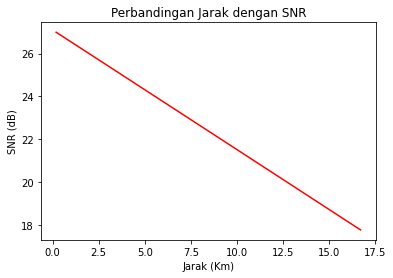

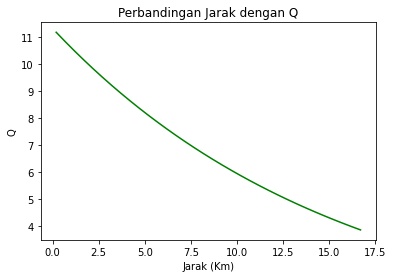

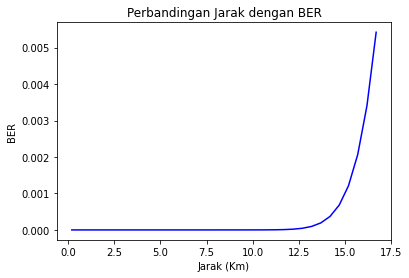

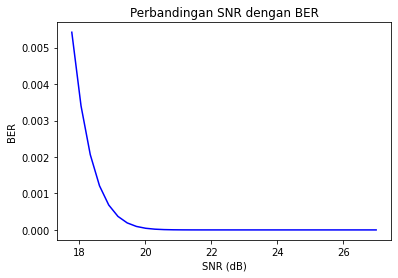

In [ ]:
#GRAFIK

#GRAFIK PERBANDINGAN JARAK DENGAN SNR
def grafik_1():
  plt.figure()
  plt.plot(d,SNR_dBm,'r')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

#GRAFIK PERBANDINGAN JARAK DENGAN Q-FACTOR
def grafik_2():
  plt.figure()
  plt.plot(d,Q,'g')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

#GRAFIK PERBANDINGAN ANTARA JARAK DENGAN BER
def grafik_3():
  plt.figure()
  plt.plot(d,BER,'b')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

#GRAFIK PERBANDINGAN ANTARA SNR DENGAN BER
def grafik_4():
  plt.figure()
  plt.plot(SNR_dBm,BER,'b')
  plt.title('Perbandingan SNR dengan BER')
  plt.xlabel('SNR (dB)')
  plt.ylabel('BER')
  plt.show()

grafik_1()
grafik_2()
grafik_3()
grafik_4()

**KESIMPULAN:**


Dari analisa grafik diatas, saya dapat menyimpulkan bahwa semakin banyak konektor, splitter, dan splicer serta pemilihan jenis fibernya akan mempengaruhi besar hambatan total, dan itu akan mempengaruhi daya terima. Dari daya terima yang dihasilkan kita dapat melihat hasil SNR, semakin jauh jarak maka semakin kecil daya terima, maka dari itu SNR juga makin kecil. Bila SNR makin kecil Q factor juga akan makin kecil. Bila Q-factor makin kecil akan mempengaruhi *Bit Error Rate*. Dari grafik yang di dapat dapat dilihat pada jarak 12.5 sampai 17.5 terjadi kenaikan BER yang signifikan secara eksponensial. Kemudian, pada grafik terakhir, perbandingan SNR dengan BER terjadi grafik yang turun secara eksponensial, terjadi penurunan yang signifikan pada SNR 16++ hingga 18 dB kemudian terlihat stabil pada 19 dB hingga 24++ dB.